In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read_data
df = pd.read_csv("/content/drive/MyDrive/Imarticus/pga-05/Projects/Linear Regression Project/Dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [5]:
# split data into train test
X = df.drop(columns = "charges")
y = df["charges"]
X_train, X_test, y_train, y_test = tts(X,y,
                                       test_size = 0.25, random_state = 42)
X_train.shape,X_test.shape

((1002, 6), (335, 6))

In [6]:
result_df = pd.DataFrame({
    "method": [],
    "r2_train": [],
    "r2_test": [],
    "adj_r2_train": [],
    "adj_r2_test": [],
    "train_mae": [],
    "test_mae":[]
})

In [7]:
def evaluation(method,X_train, X_test, y_train, y_test):
  model = LinearRegression()
  n_r_train, n_c_train = X_train.shape
  n_r_test,  n_c_test = X_test.shape

  # model fit
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # r2 score
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  # adj r2
  adj_r2_train = 1 - ((1 - train_r2)*(n_r_train - 1)/ (n_r_train - n_c_train - 1))
  adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1))

  # mae
  train_mae = mean_absolute_error(y_train, y_pred_train)
  test_mae = mean_absolute_error(y_test, y_pred_test)

  temp_df = pd.DataFrame({
    "method": [method],
    "r2_train": [round(train_r2,4)],
    "r2_test": [round(test_r2,4)],
    "adj_r2_train": [round(adj_r2_train,4)],
    "adj_r2_test": [round(adj_r2_test,4)],
    "train_mae": [round(train_mae,4)],
    "test_mae":[round(test_mae,4)]
      })
  global result_df
  result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)


  # print(f"r2 score---")
  # print(f"train_r2: {round(train_r2,4)}, test_r2: {round(test_r2,4)}")
  # print("-----------------")
  # print(f"adj r2 score---")
  # print(f"train_adj_r2: {round(adj_r2_train,4)}, test_adj_r2: {round(adj_r2_test,4)}")
  # print("-----------------")
  # print(f"MAE---")
  # print(f"train_mae: {round(train_mae,4)}, test_mae: {round(test_mae,4)}")
  # print("-----------------")
  return result_df


In [ ]:
X_train

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast
...,...,...,...,...,...,...
1096,51,female,34.96,2,yes,northeast
1131,27,male,45.90,2,no,southwest
1295,20,male,22.00,1,no,southwest
861,38,female,28.00,3,no,southwest


In [8]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
ord = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1)

X_train_enc[ord.get_feature_names_out()] = ord.fit_transform(X_train[["sex", "smoker", "region"]])
X_test_enc[ord.get_feature_names_out()] = ord.transform(X_test[["sex", "smoker", "region"]])


In [ ]:
X_train_enc.head()

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [ ]:
# baseline model
evaluation("baseline", X_train_enc, X_test_enc, y_train, y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774


In [ ]:
# taking log of y
evaluation("log y", X_train_enc, X_test_enc, np.log(y_train), np.log(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574


In [ ]:
# taking sqrt of y
evaluation("sqrt of y", X_train_enc, X_test_enc, np.sqrt(y_train), np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,log y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861


In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias = False)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train_enc),
             columns = poly.get_feature_names_out(), index = X_train.index)
X_test_poly = pd.DataFrame(poly.transform(X_test_enc),
             columns = poly.get_feature_names_out(), index = X_test.index)

In [ ]:
# polynomial features of degree 3 for all data
evaluation("poly degree 2 all columns without sqrt", X_train_poly, X_test_poly, y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,log y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
4,poly degree 3 all columns,0.8375,0.8615,0.8228,0.8157,11.1342,11.6676
5,poly degree 5 all columns,0.8744,0.4235,0.7671,2.5161,9.8170,19.6035
6,poly degree 2 all columns without sqrt,0.8862,0.5181,0.7891,2.2674,2416.8069,4919.6927
7,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790


In [ ]:
# polynomial features of degree 3 for all data
evaluation("poly degree 2 all columns with sqrt", X_train_poly, X_test_poly, np.sqrt(y_train),np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,log y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
4,poly degree 3 all columns,0.8375,0.8615,0.8228,0.8157,11.1342,11.6676
5,poly degree 5 all columns,0.8744,0.4235,0.7671,2.5161,9.8170,19.6035
6,poly degree 2 all columns without sqrt,0.8862,0.5181,0.7891,2.2674,2416.8069,4919.6927
7,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790
8,poly degree 2 all columns with sqrt,0.8271,0.8744,0.8223,0.8633,11.6488,11.1811


In [ ]:
# feature selection
# pvalue
# mi
# lasso
# corr/vif

In [ ]:
# p- values
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_enc)
# X_test_sm = sm.add_constant(X_test_enc)
model = sm.OLS(y_train, X_train_sm)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     447.1
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.38e-278
Time:                        05:51:45   Log-Likelihood:                -10155.
No. Observations:                1002   AIC:                         2.032e+04
Df Residuals:                     995   BIC:                         2.036e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.111e+04   1132.707     -9.807      0.000   -1.33e+04   -8886.214
age          245.8997     13.988     17.579      0.000     218.450     273.349
sex          -17.4679    388.584     -0.045      0.964    -780.005     745.070
bmi          314.0611     32.848      9.561      0.000     249.602     378.521
children     528.3657    162.154      3.258      0.001     210.162     846.570
smoker      2.307e+04    481.650     47.901      0.000    2.21e+04     2.4e+04
region      -203.1195    178.536     -1.138      0.256    -553.470     147.231
==============================================================================
Omnibus:                      247.781   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.993
Skew:                           1.320   Prob(JB):                    7.67e-129
Kurtosis:                       5.676   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
p_value_imp_col = ["age", "bmi", "children", "smoker"]

In [ ]:
X_train_sm = sm.add_constant(X_train_enc[p_value_imp_col])
print(X_train_sm.shape)
# X_test_sm = sm.add_constant(X_test_enc)
model = sm.OLS(y_train, X_train_sm)
model_fit = model.fit()
model_fit.summary()

(1002, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     670.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          6.75e-281
Time:                        06:15:12   Log-Likelihood:                -10156.
No. Observations:                1002   AIC:                         2.032e+04
Df Residuals:                     997   BIC:                         2.035e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.127e+04   1111.738    -10.135      0.000   -1.34e+04   -9086.359
age          246.3806     13.975     17.630      0.000     218.957     273.805
bmi          307.9932     32.380      9.512      0.000     244.453     371.534
children     531.3514    162.073      3.278      0.001     213.308     849.395
smoker      2.307e+04    480.147     48.058      0.000    2.21e+04     2.4e+04
==============================================================================
Omnibus:                      248.041   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.644
Skew:                           1.322   Prob(JB):                    5.54e-129
Kurtosis:                       5.676   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_fit.pvalues

const        4.809384e-23
age          9.207258e-61
bmi          1.355462e-20
children     1.079786e-03
smoker      8.297846e-262
dtype: float64

In [ ]:
y_pred_test = model_fit.predict(X_test_enc[p_value_imp_col])
mean_absolute_error(y_test, y_pred_test)

4394.566707994555

In [ ]:
y_pred_test = model_fit.predict(sm.add_constant(X_test_enc[p_value_imp_col]))
mean_absolute_error(y_test, y_pred_test)

4077.039602705053

In [ ]:
# polynomial features of degree 3 for all data
evaluation("imp_p_value_col", X_train_enc[p_value_imp_col], X_test_enc[p_value_imp_col],
           y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,log y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
4,poly degree 3 all columns,0.8375,0.8615,0.8228,0.8157,11.1342,11.6676
5,poly degree 5 all columns,0.8744,0.4235,0.7671,2.5161,9.8170,19.6035
6,poly degree 2 all columns without sqrt,0.8862,0.5181,0.7891,2.2674,2416.8069,4919.6927
7,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790
8,poly degree 2 all columns with sqrt,0.8271,0.8744,0.8223,0.8633,11.6488,11.1811
9,imp_p_value_col,0.7291,0.7942,0.7280,0.7917,4215.7150,4077.0396


In [ ]:
# mutual info
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train_enc, y_train)
mi_scores

mi = pd.DataFrame()

mi["col_name"] = X_train_enc.columns
mi["mi_score"] = mi_scores

mi.sort_values(by = "mi_score", ascending = False)

,col_name,mi_score
0,age,1.428257
4,smoker,0.357333
3,children,0.156883
1,sex,0.117425
2,bmi,0.083842
5,region,0.065651


<Axes: >

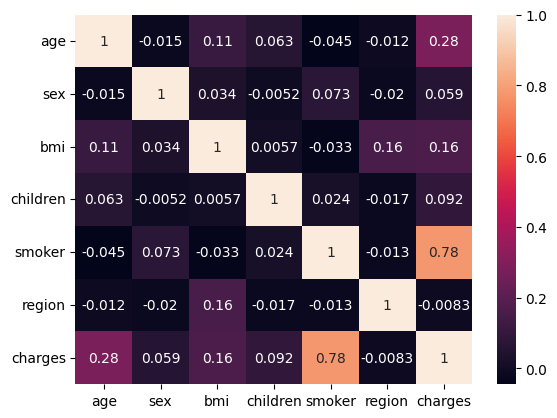

In [ ]:
X_corr = X_train_enc.copy()
X_corr["charges"] = y_train
sns.heatmap(X_corr.corr(), annot = True, fmt = ".2g")

<Axes: >

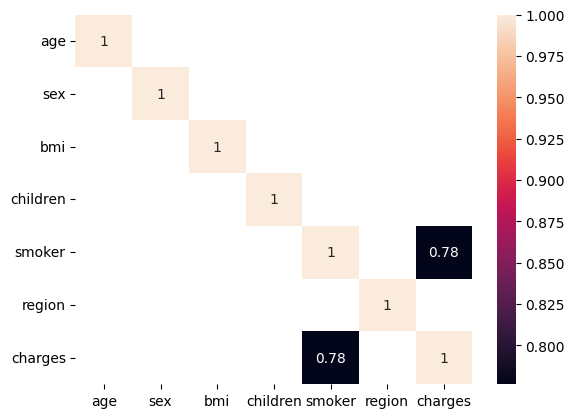

In [ ]:
sns.heatmap(X_corr.corr()[np.abs(X_corr.corr())>0.5], annot = True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif = calc_vif(X_train_enc)
vif.sort_values(by = ["VIF"], ascending = False)

,variables,VIF
2,bmi,10.642153
0,age,7.665491
5,region,3.005968
1,sex,2.044162
3,children,1.811710
4,smoker,1.251058


A VIF less than 5 indicates a low correlation of that predictor with other predictors. A value between 5 and 10 indicates a moderate correlation, while VIF values larger than 10 are a sign for high, not tolerable correlation of model predictors (James et al. 2013)

In [ ]:
# lasso
model_lasso = Lasso(alpha=1000)
model_lasso.fit(X_train_enc, y_train)
col_df = pd.DataFrame({
    "col_name": X_train_enc.columns,
    "lasso_coef": model_lasso.coef_
})
col_df

,col_name,lasso_coef
0,age,238.038354
1,sex,0.000000
2,bmi,269.481524
3,children,0.000000
4,smoker,16935.142973
5,region,-0.000000


- p_value_imp_col = ["age", "bmi", "children", "smoker"]
- mi_imp_col = ["age", "children", "smoker"]
- corr/vif = ["age", "children", "smoker", "region", "sex"]
- lasso = ["age", "bmi", "children", "smoker"]

In [10]:
lasso = ["age", "bmi", "children", "smoker"]
poly = PolynomialFeatures(2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])
evaluation("poly with degree 2 imp cols sqrt y", X_train_poly, X_test_poly, np.sqrt(y_train), np.sqrt(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,poly with degree 2 imp cols sqrt y,0.822,0.8686,0.8195,0.8629,11.7491,11.2049


In [15]:
X_train[:5]

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast


In [16]:
X_train_enc[:5]

,age,sex,bmi,children,smoker,region
763,27,1.0,26.03,0,0.0,0.0
1079,63,1.0,33.66,3,0.0,2.0
178,46,0.0,28.90,2,0.0,3.0
287,63,0.0,26.22,0,0.0,1.0
1290,38,0.0,19.95,2,0.0,0.0


In [11]:
lasso = ["age", "bmi", "children", "smoker"]
poly = PolynomialFeatures((2,4), include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])

model = LinearRegression()
model.fit(X_train_poly, np.sqrt(y_train))
y_pred_train_sqrt = model.predict(X_train_poly)
y_pred_test_sqrt = model.predict(X_test_poly)
print(mean_absolute_error(y_train, y_pred_train_sqrt**2))
print(mean_absolute_error(y_test, y_pred_test_sqrt**2))

2508.393319719684
2502.9962518080733


In [ ]:
poly = PolynomialFeatures((3,4), include_bias = False)
X_train_poly = poly.fit_transform(X_train_enc[lasso])
X_test_poly = poly.transform(X_test_enc[lasso])
evaluation("poly with degree (3,4) imp cols log y", X_train_poly, X_test_poly, np.log(y_train), np.log(y_test))



,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_mae,test_mae
0,baseline,0.7294,0.7963,0.7278,0.7925,4210.5756,4063.0774
1,log y,0.7456,0.8228,0.7440,0.8196,0.2886,0.2574
2,log y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
3,sqrt of y,0.7572,0.8326,0.7557,0.8295,15.2912,14.1861
4,poly degree 3 all columns,0.8375,0.8615,0.8228,0.8157,11.1342,11.6676
5,poly degree 5 all columns,0.8744,0.4235,0.7671,2.5161,9.8170,19.6035
6,poly degree 2 all columns without sqrt,0.8862,0.5181,0.7891,2.2674,2416.8069,4919.6927
7,poly degree 2 all columns without sqrt,0.8330,0.8753,0.8283,0.8643,2920.3642,2858.1790
8,poly degree 2 all columns with sqrt,0.8271,0.8744,0.8223,0.8633,11.6488,11.1811
9,imp_p_value_col,0.7291,0.7942,0.7280,0.7917,4215.7150,4077.0396


In [12]:
model = LinearRegression()
model.fit(X_train_poly, np.log(y_train))
y_pred_train_sqrt = model.predict(X_train_poly)
y_pred_test_sqrt = model.predict(X_test_poly)
print(mean_absolute_error(y_train, np.exp(y_pred_train_sqrt)))
print(mean_absolute_error(y_test, np.exp(y_pred_test_sqrt)))

2389.3534465613284
2452.9385155683326


In [ ]:
model.coef_

array([ 1.57531390e-05,  3.05395254e-05,  2.67521817e-04, -1.03815522e-03,
        1.49768780e-05, -1.71367954e-03,  1.07887842e-04,  1.75642720e-03,
        9.16255994e-03,  1.90376050e-02, -3.35614252e-05,  2.15381807e-03,
        5.47050019e-03, -3.05034059e-03, -1.88286160e-02, -1.26676311e-01,
        1.40563864e-02,  4.50859203e-02, -3.06205244e-02,  1.62690165e+00,
       -2.77963328e-07,  3.15025676e-07,  2.58393733e-07,  1.59497729e-05,
       -1.57509219e-06,  4.98649079e-06,  1.55704807e-05, -7.40160623e-05,
       -2.29762783e-04, -1.03814428e-03,  1.06058437e-06,  1.44996441e-05,
       -3.61689574e-05,  6.18529411e-05,  2.19296399e-04,  1.07889075e-04,
        4.65847827e-04, -2.61612234e-04,  9.16255762e-03,  1.90376044e-02,
        2.08666997e-07, -3.63762458e-05, -1.06888630e-04,  3.30544862e-05,
        4.52901282e-04,  5.47050151e-03, -3.69087216e-04, -1.08767564e-03,
       -1.88286158e-02, -1.26676311e-01, -3.05966821e-03, -9.53248616e-03,
        4.50859211e-02, -

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('insurance_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('/content/insurance_pkl' , 'rb') as f:
    lr = pickle.load(f)

lr.coef_

array([ 1.57531390e-05,  3.05395254e-05,  2.67521817e-04, -1.03815522e-03,
        1.49768780e-05, -1.71367954e-03,  1.07887842e-04,  1.75642720e-03,
        9.16255994e-03,  1.90376050e-02, -3.35614252e-05,  2.15381807e-03,
        5.47050019e-03, -3.05034059e-03, -1.88286160e-02, -1.26676311e-01,
        1.40563864e-02,  4.50859203e-02, -3.06205244e-02,  1.62690165e+00,
       -2.77963328e-07,  3.15025676e-07,  2.58393733e-07,  1.59497729e-05,
       -1.57509219e-06,  4.98649079e-06,  1.55704807e-05, -7.40160623e-05,
       -2.29762783e-04, -1.03814428e-03,  1.06058437e-06,  1.44996441e-05,
       -3.61689574e-05,  6.18529411e-05,  2.19296399e-04,  1.07889075e-04,
        4.65847827e-04, -2.61612234e-04,  9.16255762e-03,  1.90376044e-02,
        2.08666997e-07, -3.63762458e-05, -1.06888630e-04,  3.30544862e-05,
        4.52901282e-04,  5.47050151e-03, -3.69087216e-04, -1.08767564e-03,
       -1.88286158e-02, -1.26676311e-01, -3.05966821e-03, -9.53248616e-03,
        4.50859211e-02, -

In [13]:
import joblib
joblib.dump(model, "insurance_joblib")

['insurance_joblib']

In [14]:
lr2 = joblib.load("/content/insurance_joblib")
lr2.coef_

array([ 5.52591704e-03, -5.44832315e-03, -6.39146926e-02, -3.47641299e-02,
        3.90347529e-03,  9.18906256e-02, -1.43343275e-01,  4.20438951e-01,
       -3.63301879e-01,  2.33668504e+00, -9.68158557e-05, -7.64991633e-06,
        1.11345930e-03, -1.18996034e-04,  1.47763813e-04, -1.33495567e-04,
        1.97147193e-03, -3.32044446e-03,  2.10017668e-02, -3.47641510e-02,
       -1.33477884e-04, -2.29873303e-03,  7.07944058e-03, -1.03427921e-02,
       -1.30556805e-03, -1.43343275e-01, -7.67783412e-02,  3.45591626e-02,
       -3.63301880e-01,  2.33668505e+00,  4.53557000e-07,  5.76134185e-07,
       -3.32828919e-06,  7.37900333e-06, -9.39337670e-07, -5.71193662e-06,
       -3.71630093e-06, -4.94854139e-05, -3.79512719e-04, -1.18997018e-04,
       -4.88720291e-07,  8.52067933e-06, -6.52253847e-05,  8.11118641e-05,
       -1.50552286e-04,  1.97147194e-03,  1.01361970e-03, -3.57894382e-06,
        2.10017666e-02, -3.47641509e-02,  9.98218931e-07,  1.62688229e-05,
       -1.29577334e-04,  

In [ ]:
lasso

['age', 'bmi', 'children', 'smoker']

In [21]:
X_train["children"].unique()

array([0, 3, 2, 1, 4, 5])

In [17]:
joblib.dump(poly, "poly_obj")

['poly_obj']

In [18]:
poly_obj = joblib.load("poly_obj")
